## <center>RETAIL CASE STUDY<center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re


## Sol 1

In [18]:
customer=pd.read_csv('C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Retail/Customer.csv')
transaction=pd.read_csv('C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Retail/Transactions.csv')
prodcat=pd.read_csv('C:/Users/jmd/Desktop/LALIT/CASE STUDY - python/CS-Retail/prod_cat_info.csv')

In [81]:
cust_tran=pd.merge(left=transaction,right=customer,left_on="cust_id",right_on="customer_Id",how="left")

In [82]:
customer_final=pd.merge(left=cust_tran,
                        right=prodcat,
                        left_on=["prod_subcat_code","prod_cat_code"],
                        right_on=["prod_sub_cat_code","prod_cat_code"],
                        how="left")

In [83]:
customer_final.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY


In [22]:
customer_final.drop("prod_subcat_code",axis=1,inplace=True)
customer_final.drop("cust_id",axis=1,inplace=True)

## Sol 2 - Summary Report for customer_final

## 2(a)

In [23]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     23053 non-null  int64  
 1   tran_date          23053 non-null  object 
 2   prod_cat_code      23053 non-null  int64  
 3   Qty                23053 non-null  int64  
 4   Rate               23053 non-null  int64  
 5   Tax                23053 non-null  float64
 6   total_amt          23053 non-null  float64
 7   Store_type         23053 non-null  object 
 8   customer_Id        23053 non-null  int64  
 9   DOB                23053 non-null  object 
 10  Gender             23044 non-null  object 
 11  city_code          23045 non-null  float64
 12  prod_cat           23053 non-null  object 
 13  prod_sub_cat_code  23053 non-null  int64  
 14  prod_subcat        23053 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ MB


## 2(b)

In [24]:
customer_final.head(10)

,transaction_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,28-02-2014,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,27-02-2014,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,24-02-2014,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,24-02-2014,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,23-02-2014,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
5,97439039119,23-02-2014,3,-2,-824,173.040,-1821.040,TeleShop,272357,09-10-1982,F,6.0,Electronics,8,Personal Appliances
6,45649838090,22-02-2014,6,-1,-1450,152.250,-1602.250,e-Shop,273667,29-05-1981,M,9.0,Home and kitchen,11,Bath
7,22643667930,22-02-2014,6,-1,-1225,128.625,-1353.625,TeleShop,271489,21-04-1971,M,9.0,Home and kitchen,12,Tools
8,79792372943,22-02-2014,1,-3,-908,286.020,-3010.020,MBR,275108,04-11-1971,F,8.0,Clothing,3,Kids
9,50076728598,21-02-2014,3,-4,-581,244.020,-2568.020,e-Shop,269014,27-11-1979,F,3.0,Electronics,8,Personal Appliances


In [25]:
customer_final.tail(10)

,transaction_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23043,49882891062,25-01-2011,5,4,1330,558.600,5878.600,e-Shop,271982,10-08-1976,M,8.0,Books,10,Non-Fiction
23044,14787475597,25-01-2011,3,5,969,508.725,5353.725,e-Shop,273982,12-10-1991,M,4.0,Electronics,4,Mobiles
23045,50691119572,25-01-2011,5,1,1148,120.540,1268.540,TeleShop,273031,17-01-1980,F,8.0,Books,6,DIY
23046,40893803228,25-01-2011,6,3,1077,339.255,3570.255,e-Shop,272049,28-06-1975,F,6.0,Home and kitchen,11,Bath
23047,30856003613,25-01-2011,2,2,444,93.240,981.240,TeleShop,266866,18-04-1974,M,4.0,Footwear,4,Kids
23048,94340757522,25-01-2011,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0,Books,12,Academic
23049,89780862956,25-01-2011,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0,Clothing,4,Mens
23050,85115299378,25-01-2011,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0,Home and kitchen,2,Furnishing
23051,72870271171,25-01-2011,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0,Books,11,Children
23052,77960931771,25-01-2011,5,1,447,46.935,493.935,TeleShop,271961,15-01-1982,M,1.0,Books,11,Children


## 2(c)

In [26]:
five_pt_summ=customer_final.describe().iloc[3:,:]
five_pt_summ

,transaction_id,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code,prod_sub_cat_code
min,3.268991e+06,1.0,-5.0,-1499.0,7.350,-8270.925,266783.0,1.0,1.0
25%,2.493864e+10,2.0,1.0,312.0,98.280,762.450,268935.0,3.0,3.0
50%,5.009313e+10,4.0,3.0,710.0,199.080,1754.740,270980.0,5.0,5.0
75%,7.533000e+10,5.0,4.0,1109.0,365.715,3569.150,273114.0,8.0,10.0
max,9.998755e+10,6.0,5.0,1500.0,787.500,8287.500,275265.0,10.0,12.0


## 2(d)

In [27]:
obj_summ=customer_final.loc[:,customer_final.dtypes=="object"]

In [28]:
obj_summ.drop(['tran_date','DOB'],axis=1,).describe()

,Store_type,Gender,prod_cat,prod_subcat
count,23053,23044,23053,23053
unique,4,2,6,18
top,e-Shop,M,Books,Women
freq,9311,11811,6069,3048


In [29]:
object_columns = customer_final.select_dtypes(include = ['object']).columns
customer_final[object_columns].Store_type.value_counts()

e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64

In [30]:
customer_final[object_columns].prod_cat.value_counts()

Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64

In [31]:
customer_final[object_columns].Gender.value_counts()

M    11811
F    11233
Name: Gender, dtype: int64

In [32]:
customer_final[object_columns].prod_subcat.value_counts()

Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: prod_subcat, dtype: int64

## Sol 3

In [33]:
cont_vars=customer_final.select_dtypes(['int','float'])
cat_vars=customer_final.select_dtypes('object')

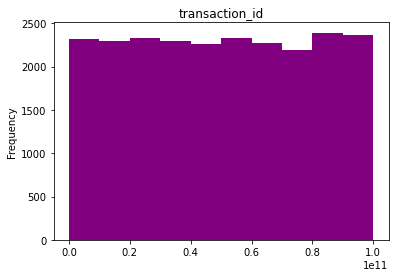

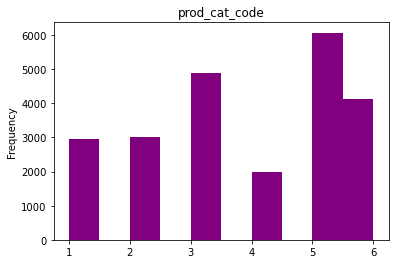

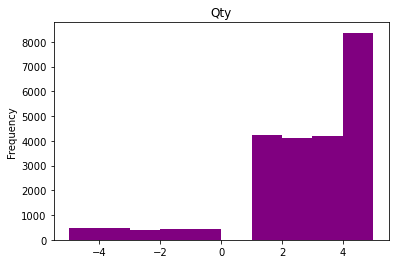

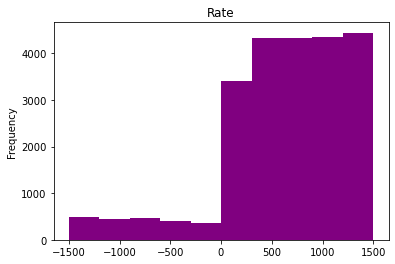

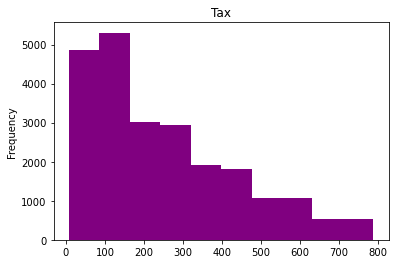

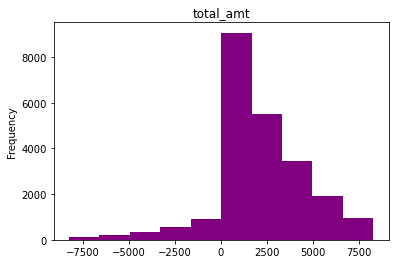

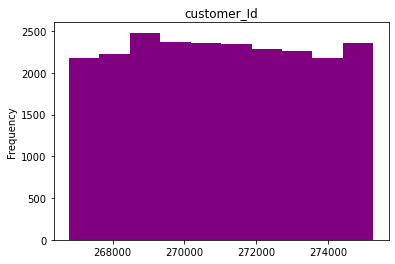

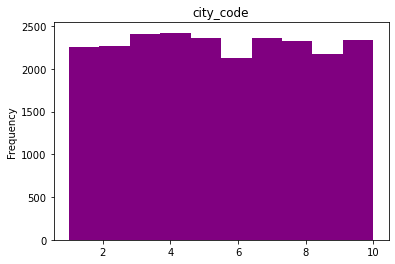

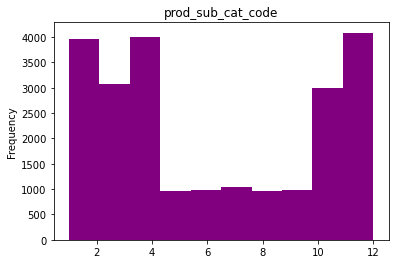

In [34]:
for i in cont_vars:
    cont_vars[i].plot(kind='hist',color='purple')
    plt.title(i)
    plt.show()

In [35]:
freq_bars_cat_vars=cat_vars.drop(['tran_date','DOB'],axis=1)

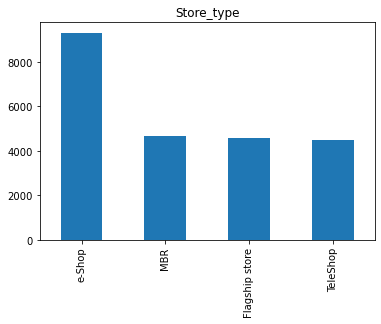

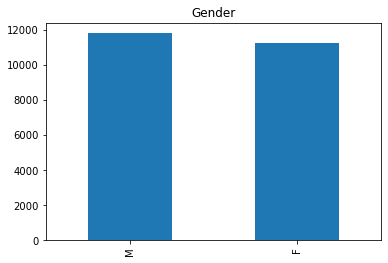

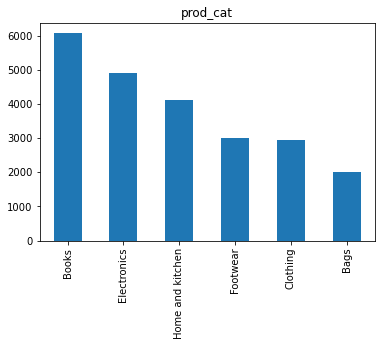

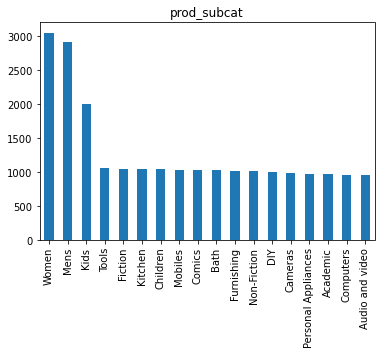

In [36]:
for i in freq_bars_cat_vars:
    freq_bars_cat_vars[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.show()

## Sol 4

## 4(a)

In [37]:
customer_final["tran_date"]=customer_final.tran_date.apply(lambda x : x.replace("/","-"))

In [38]:
customer_final["tran_date"]=pd.to_datetime(customer_final.tran_date,format='%d-%m-%Y')

In [45]:
cust=customer_final.sort_values(by="tran_date")
cust

,transaction_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23052,77960931771,2011-01-25,5,1,447,46.935,493.935,TeleShop,271961,15-01-1982,M,1.0,Books,11,Children
23033,32887353269,2011-01-25,1,1,276,28.980,304.980,Flagship store,268885,14-04-1989,F,6.0,Clothing,3,Kids
23034,28972634039,2011-01-25,3,1,334,35.070,369.070,MBR,275227,23-09-1989,M,4.0,Electronics,9,Cameras
23035,42161597232,2011-01-25,1,3,147,46.305,487.305,MBR,267094,24-11-1992,M,9.0,Clothing,3,Kids
23036,46821751538,2011-01-25,5,5,941,494.025,5199.025,TeleShop,269160,24-01-1972,F,1.0,Books,10,Non-Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,51750724947,2014-02-23,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,2014-02-24,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
2,51750724947,2014-02-24,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
1,29258453508,2014-02-27,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers


In [47]:
maxi=cust.tran_date.head(1)
mini=cust.tran_date.tail(1)
print(maxi)
print(mini)

23052   2011-01-25
Name: tran_date, dtype: datetime64[ns]
0   2014-02-28
Name: tran_date, dtype: datetime64[ns]


In [48]:
maximum_date=pd.to_datetime(maxi,format="%d/%m/%Y")
minimum_date=pd.to_datetime(mini,format="%d/%m/%Y")

In [49]:
minimum_date

0   2014-02-28
Name: tran_date, dtype: datetime64[ns]

In [50]:
maximum_date

23052   2011-01-25
Name: tran_date, dtype: datetime64[ns]

## 4(b)

In [51]:
customer_final[customer_final.total_amt<0]['total_amt'].count()

2177

## Sol 5

In [88]:
customer_final.groupby(['prod_cat','Gender'])["Qty"].sum()

prod_cat          Gender
Bags              F         2362
                  M         2346
Books             F         7070
                  M         7587
Clothing          F         3425
                  M         3748
Electronics       F         5832
                  M         6476
Footwear          F         3716
                  M         3555
Home and kitchen  F         4895
                  M         5041
Name: Qty, dtype: int64

### Clearly 'Bags' and 'Footwear' are more popular among females vs male customers

## Sol 6

In [55]:
cty_max_cust=customer_final.groupby('city_code')['customer_Id'].count().reset_index().sort_values('customer_Id',ascending=False)
cty_max_cust.head(1)

,city_code,customer_Id
3,4.0,2422


In [56]:
prcnt_of_cust=(cty_max_cust.customer_Id[3]/cty_max_cust.customer_Id.sum())*100
prcnt_of_cust

10.509871989585594

## Sol 7

In [57]:
Sol7=customer_final.groupby('Store_type')[['total_amt','Qty']].sum()
Sol7

,total_amt,Qty
Store_type,,
Flagship store,9.715688e+06,11133
MBR,9.674486e+06,11194
TeleShop,9.364781e+06,10984
e-Shop,1.982482e+07,22763


### 'e-Shop' sells the maximum products by value and by quantity

## Sol 8

In [58]:
Sol8_grpd=customer_final.groupby(['Store_type','prod_cat'])['total_amt'].sum().reset_index()
Sol8_grpd.head()

,Store_type,prod_cat,total_amt
0,Flagship store,Bags,870548.835
1,Flagship store,Books,2488205.850
2,Flagship store,Clothing,1194423.230
3,Flagship store,Electronics,2215136.040
4,Flagship store,Footwear,1234806.560


In [59]:
Sol8=Sol8_grpd[(Sol8_grpd.Store_type=='Flagship store')&(Sol8_grpd.prod_cat.isin(['Clothing','Electronics']))]

In [60]:
Sol8.total_amt.sum()

3409559.27

## Sol 9

In [61]:
Sol9 =customer_final.groupby(['prod_cat','Gender']).total_amt.sum().reset_index()
Sol9[(Sol9.prod_cat=='Electronics')&(Sol9.Gender=='M')]

,prod_cat,Gender,total_amt
7,Electronics,M,5703109.425


## Sol10

In [62]:
Sol10df=customer_final[customer_final.total_amt>0]
Sol10df.head(3)

,transaction_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
10,29258453508,2014-02-20,3,5,1497,785.925,8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
11,25455265351,2014-02-20,6,3,1360,428.400,4508.400,e-Shop,267750,13-10-1986,M,1.0,Home and kitchen,12,Tools
12,1571002198,2014-02-20,5,4,587,246.540,2594.540,e-Shop,275023,09-03-1971,M,6.0,Books,6,DIY


In [63]:
answer=pd.DataFrame(Sol10df.groupby("customer_Id").transaction_id.agg("count")).reset_index()
answer[answer.transaction_id>10]

,customer_Id,transaction_id
4,266794,11
2426,270535,11
2606,270803,11
3867,272741,11
4032,273014,11
4815,274227,11


In [72]:
customer_final.replace()

,transaction_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,2014-02-28,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,29258453508,2014-02-27,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers
2,51750724947,2014-02-24,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY
3,93274880719,2014-02-24,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath
4,51750724947,2014-02-23,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY


## Sol 11

In [90]:
customer_final["tran_date"]=customer_final.tran_date.apply(lambda x : str(x).replace("/","-"))

In [91]:
max_dte=pd.to_datetime(customer_final.tran_date).max()
max_dte

Timestamp('2014-12-02 00:00:00')

In [92]:
maxage=max_dte+pd.DateOffset(years=-25)
minage=max_dte+pd.DateOffset(years=-35)

In [93]:
minage

Timestamp('1979-12-02 00:00:00')

In [88]:
maxage

Timestamp('1989-12-02 00:00:00')

In [114]:
dob=pd.to_datetime(customer_final.DOB,format="%d-%m-%Y")
dob

0       1981-09-26
1       1973-05-11
2       1992-07-27
3       1981-06-08
4       1992-07-27
           ...    
23048   1972-02-21
23049   1984-04-27
23050   1976-06-20
23051   1970-05-22
23052   1982-01-15
Name: DOB, Length: 23053, dtype: datetime64[ns]

In [115]:
t_date=pd.to_datetime(customer_final.tran_date,format='%d-%m-%Y')
t_date

0       2014-02-28
1       2014-02-27
2       2014-02-24
3       2014-02-24
4       2014-02-23
           ...    
23048   2011-01-25
23049   2011-01-25
23050   2011-01-25
23051   2011-01-25
23052   2011-01-25
Name: tran_date, Length: 23053, dtype: datetime64[ns]

In [249]:
reqcust=np.where((dob>minage)&(dob<maxage),True,False)

In [248]:
customer_final["reqcust"]=reqcust
customer_final.head(3)

,transaction_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,reqcust
0,80712190438,2014-02-28,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women,True
1,29258453508,2014-02-27,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,Electronics,5,Computers,False
2,51750724947,2014-02-24,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0,Books,6,DIY,False


In [122]:
req_cust=customer_final[customer_final.reqcust==True]
req_cust.head(3)

,transaction_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,reqcust
0,80712190438,28-02-2014,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women,True
3,93274880719,24-02-2014,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0,Home and kitchen,11,Bath,True
5,97439039119,23-02-2014,3,-2,-824,173.040,-1821.040,TeleShop,272357,09-10-1982,F,6.0,Electronics,8,Personal Appliances,True


### Here in 'req_cust' are the customers with age 25 to 35

## 11(a)

In [128]:
Sol11a=req_cust.groupby('prod_cat').total_amt.sum().reset_index()
Sol11a

,prod_cat,total_amt
0,Bags,1816595.690
1,Books,5550918.880
2,Clothing,2871308.245
3,Electronics,4772238.640
4,Footwear,2738170.110
5,Home and kitchen,3697247.125


In [137]:
Sol11a[Sol11a.prod_cat.isin(['Books','Electronics'])].total_amt.sum()

10323157.52

## 11(b)

In [207]:
req_cust[req_cust.tran_date >=('01-01-2014')].total_amt.sum()

21446478.69

In [204]:
dte2=pd.to_datetime(req_cust.tran_date,format='%d-%m-%Y')
max_dt_final=dte2.max()+pd.DateOffset(month=1,day=1)
max_dt_final

Timestamp('2014-01-01 00:00:00')

In [205]:
Sol11b=np.where(dte2>max_dt_final,True,False)
req_cust['Sol11b']=Sol11b

C:\Users\jmd\AppData\Local\Temp/ipykernel_9268/92849030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_cust['Sol11b']=Sol11b


In [206]:
final_ans_11b=req_cust[req_cust.Sol11b==True]
final_ans_11b.total_amt.sum()

955820.58